# 2D-Diffusion, single phase, point source

In [6]:
# import relevant packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

Specify geometry, diffusion coeffient and initial concentration 

In [7]:
# define geometry
# size of plate [m]
w = h = 5.
# intervals (cell size) in x- and y-direction [m]
dx=dy=0.01
# diffusion coefficient [m2.s-1]
D = 5e-6 # 0.5e-3
# initial conditions
Csur, C0= 0, 1

Define no. of cells and initial tracer concentration

In [8]:
# calculate no. of cells
nx, ny = int(w/dx)+1, int(h/dy)+1

# squares of the intervals
dx2, dy2 = dx*dx, dy*dy

# define time step
dt = 1

# initial conditions

# Csur on all cells (matrix)
u0 = Csur * np.ones((nx, ny))

# copy of matrix
u = u0.copy()

# define tracer concentration: circle with raduis r, centered at (cx,cy)[m]
r, cx, cy = 0.5, w/2, w/2
r2 = r**2
for i in range(nx):
    for j in range(ny):
        p2 = (i*dx-cx)**2 + (j*dy-cy)**2
        if p2 < r2:
            u0[i,j] = C0

Define function for numerical computation

In [9]:
# function for numerical computation
def do_timestep(u0, u):
    # forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u0[1:-1, 1:-1] + D * dt * (
          (u0[2:, 1:-1] - 2*u0[1:-1, 1:-1] + u0[:-2, 1:-1])/dx2
          + (u0[1:-1, 2:] - 2*u0[1:-1, 1:-1] + u0[1:-1, :-2])/dy2 )

    u0 = u.copy()
    return u0, u

Here, the simulation starts and results are plotted incl. CFD solution 

Credit to https://scipython.com/book/chapter-7-matplotlib/examples/the-two-dimensional-diffusion-equation/

current timestep:0
current iteration step:0
current timestep:5000
current iteration step:5000
current timestep:10000
current iteration step:10000
current timestep:15000
current iteration step:15000


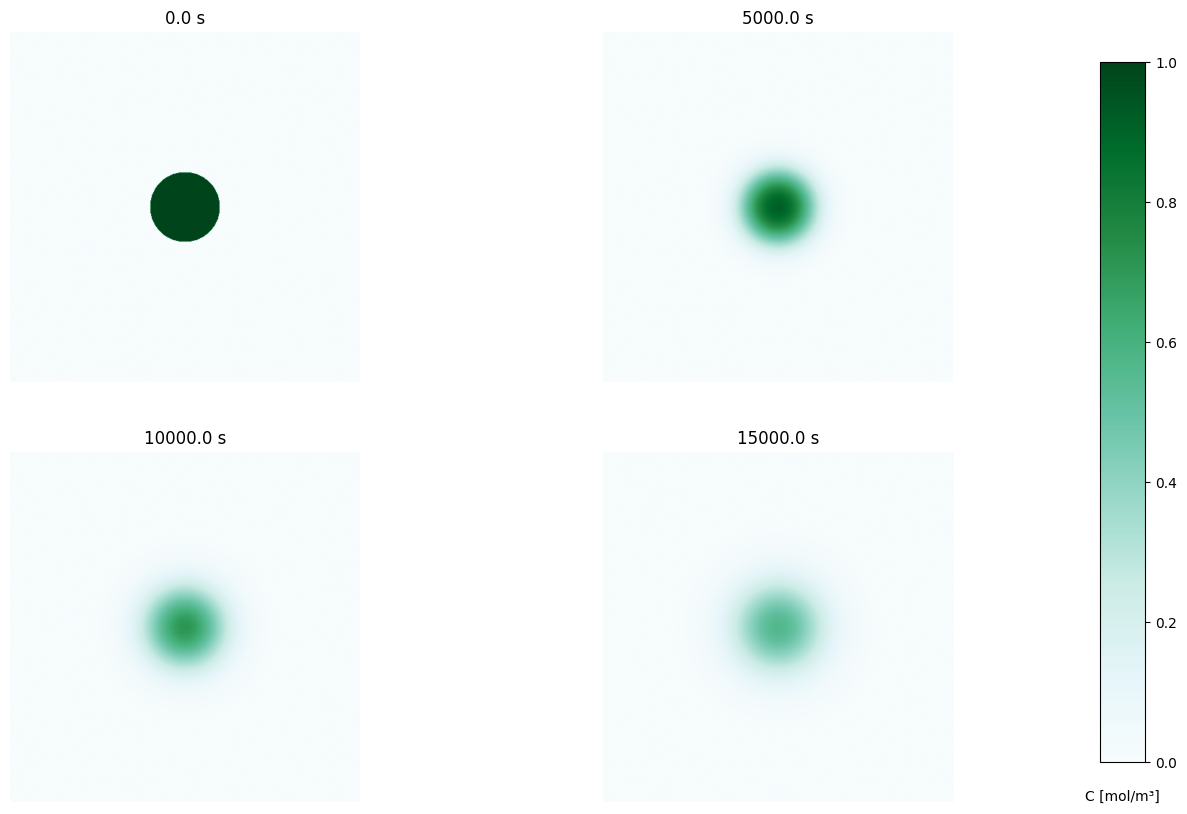

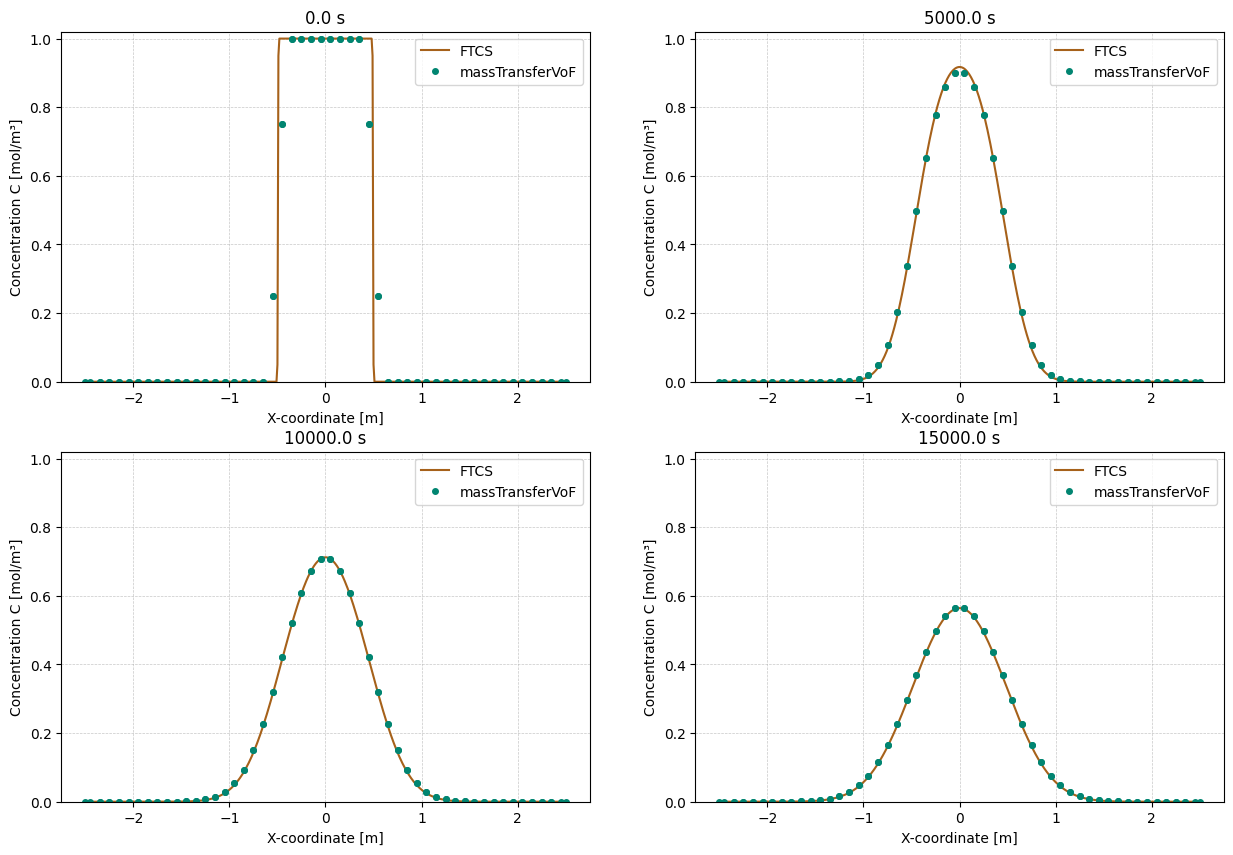

In [10]:
# calculated time steps
duration = 15001
nsteps = int(duration/dt)
mplot = [0, 5000, 10000, 15000]
fignum = 0

# define plots
fig = plt.figure(figsize=(15, 10))
fig2 = plt.figure(figsize=(15, 10))

# perform simulation for nsteps
for m in range(nsteps):
    # compute concentration u
    u0, u = do_timestep(u0, u)
    # plot results, if current time step is in mfig
    if int(m*dt) in mplot:
        print('current timestep:' + str(m*dt))
        print('current iteration step:' + str(m))
        fignum += 1
        ax = fig.add_subplot(220 + fignum)

        im = ax.imshow(u.copy(), cmap=plt.get_cmap('BuGn'), vmin=Csur, vmax=1)

        ax.set_axis_off()
        ax.set_title('{:.1f} s'.format(m*dt))

        # line plot over midline 
        ax2 = fig2.add_subplot(220 + fignum)    
        x_coords = np.linspace(-w/2,  w/2,  nx)

        mid_idx  = ny // 2
        midline = u[mid_idx, :]
        ax2.plot(x_coords, midline, label='FTCS', color='#a6611a')

        # add cfd comparison
        time_label = f"{int(m):02d}s"
        cfd_filename = f"../data/2D_Diff/2D_Diff_t{time_label}.csv"
        if os.path.isfile(cfd_filename):
            df_cfd = pd.read_csv(cfd_filename)
            if 'C' in df_cfd.columns and 'Points:1' in df_cfd.columns:
                x_cfd = df_cfd['Points:1'] - 2.5 
                ax2.plot(x_cfd, df_cfd['C'], marker ='o', ms=4 ,label='massTransferVoF', linestyle='None',color='#018571')
            else:
                print(f"column missing in {cfd_filename} (need: 'C' and 'Points:1')")
        else:
            print(f"file not found: {cfd_filename}")

        ax2.set_xlabel('X-coordinate [m]')
        ax2.set_ylabel('Concentration C [mol/m³]')
        ax2.set_title('{:.1f} s'.format(m))
        ax2.set_ylim(Csur, C0 + 0.02)
        ax2.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
        ax2.legend()
# specify plot
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
cbar_ax.set_xlabel('C [mol/m³]', labelpad=20)
fig.colorbar(im, cax=cbar_ax)

fig.savefig("../figures/2D_diffusion_colormap.png", dpi=300, bbox_inches='tight')
fig2.savefig("../figures/2D_diffusion_lineplot.png", dpi=300, bbox_inches='tight')
# show plot
plt.show()



